# Logistic Regression

## The Logistic Function

In the case of `logistic regression`, we use the `logistic function`.

<img src="images/logistic1.png" alt="" style="width: 150px;"/>


In [46]:
import math

def logistic(x):
    return 1.0 / (1 + math.exp(-x))

In [79]:
xs = [x for x in range(-10, 10, 1)]
xs[:10]

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1]

In [80]:
ys = [logistic(x) for x in xs]
ys[:10] # near 0

[4.5397868702434395e-05,
 0.00012339457598623172,
 0.0003353501304664781,
 0.0009110511944006454,
 0.0024726231566347743,
 0.0066928509242848554,
 0.01798620996209156,
 0.04742587317756678,
 0.11920292202211755,
 0.2689414213699951]

In [81]:
ys[-10:]

[0.5,
 0.7310585786300049,
 0.8807970779778823,
 0.9525741268224334,
 0.9820137900379085,
 0.9933071490757153,
 0.9975273768433653,
 0.9990889488055994,
 0.9996646498695336,
 0.9998766054240137]

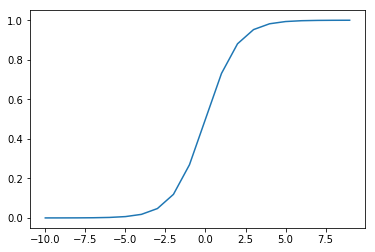

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(xs,ys)

In [83]:
# Logistic function derivative
def logistic_prime(x: float) -> float:
    y = logistic(x)
    return y * (1 - y)

## The Model

<img src="images/logistic2.png" alt="" style="width: 200px;"/>

where f is the `logistic` function.

Because log is strictly increasing function, any beta that maximizes the log likelihood
also maximizes the likelihood, and vice versa:

In [98]:
from scratch.linear_algebra import Vector, dot, vector_sum

def _negative_log_likelihood(x: Vector, y: float, beta: Vector) -> float:
    """the negative log likelihood for one data point"""
    if y == 1:
        return -math.log(logistic(dot(x, beta)))
    else:
        return -math.log(1 - logistic(dot(x, beta)))

If we assume different data points are independent from one another, the overall like‐ lihood is just the product of the individual likelihoods. Which means the overall log likelihood is the sum of the individual log likelihoods:

In [86]:
from typing import List

def negative_log_likelihood(xs: List[Vector], ys: List[float], beta: Vector) -> float:
    return sum(_negative_log_likelihood(x, y, beta) for x, y in zip(xs, ys))

In [100]:
# A little bit of calculus gives us the gradient:
def _negative_log_partial_j(x_i, y_i, beta, j): 
    """the jth partial derivative for one data point.
    here i is the index of the data point, j the index of the derivative"""
    return -(y_i - logistic(dot(x_i, beta))) * x_i[j]

def _negative_log_gradient_i(x_i, y_i, beta): 
    """the gradient of the log likelihood corresponding to the ith data point"""
    return [_negative_log_partial_j(x_i, y_i, beta, j) for j in range(len(beta))]

def negative_log_gradient(x, y, beta): 
    return vector_sum([_negative_log_gradient_i(x_i, y_i, beta) for x_i, y_i in zip(x,y)])

In [101]:
# Split data into a training and test data set

from scratch.machine_learning import train_test_split
import random
import tqdm

xs = [[1] + row[:2] for row in data] # each element is [1, experience, salary] 
ys = [row[2] for row in data] # each element is paid_account
rescaled_xs = rescale(xs)

random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(rescaled_xs, ys, 0.33)

learning_rate = 0.01

# pick a random starting point
beta = [random.random() for _ in range(3)]

with tqdm.trange(5000) as t:
    for epoch in t:
        gradient = negative_log_gradient(x_train, y_train, beta)
        beta = gradient_step(beta, gradient, -learning_rate)
        loss = negative_log_likelihood(x_train, y_train, beta)
        t.set_description(f"loss: {loss:.3f} beta: {beta}")

loss: 39.963 beta: [-2.0239032476251424, 4.693047853942649, -4.469811321910748]: 100%|██████████| 5000/5000 [00:10<00:00, 492.50it/s]


In [103]:
# Transform coefficients for the `rescaled data` to the original data

means, stdevs = scale(xs)
beta_unscaled = [(beta[0]
                 - beta[1] * means[1] / stdevs[1]
                 - beta[2] * means[2] / stdevs[2]),
                beta[1] / stdevs[1],
                beta[2] / stdevs[2]]
beta_unscaled

[8.927236932527311, 1.6482026277676038, -0.00028768900920142336]

- Unfortunately, these are not as easy to interpret as linear regression coefficients. All else being equal, an extra year of experience adds 1.6 to the input of logistic. All else being equal, an extra $10,000 of salary subtracts 2.88 from the input of logistic.
- What we can say is that—all else being equal—people with more experience are more likely to pay for accounts. And that—all else being equal—people with higher salaries are less likely to pay for accounts. (This is also somewhat apparent when we plotted the data - see below.)

continuation in Example 2 section

## Example 1 (Using Linear Regression for Classification):
We have an anonymized data set of about 200 users, containing each user’s salary, her years of experience as a data scientist, and whether she paid for a premium account. As is usual with categorical variables, we represent the dependent variable as either 0 (no premium account) or 1 (premium account). Our data is in a matrix where each row is a list [experience, salary, paid_account]. Let’s turn it into the format we need:

In [3]:
tuples = [(0.7,48000,1),(1.9,48000,0),(2.5,60000,1),(4.2,63000,0),(6,76000,0),(6.5,69000,0),(7.5,76000,0),(8.1,88000,0),(8.7,83000,1),(10,83000,1),(0.8,43000,0),(1.8,60000,0),(10,79000,1),(6.1,76000,0),(1.4,50000,0),(9.1,92000,0),(5.8,75000,0),(5.2,69000,0),(1,56000,0),(6,67000,0),(4.9,74000,0),(6.4,63000,1),(6.2,82000,0),(3.3,58000,0),(9.3,90000,1),(5.5,57000,1),(9.1,102000,0),(2.4,54000,0),(8.2,65000,1),(5.3,82000,0),(9.8,107000,0),(1.8,64000,0),(0.6,46000,1),(0.8,48000,0),(8.6,84000,1),(0.6,45000,0),(0.5,30000,1),(7.3,89000,0),(2.5,48000,1),(5.6,76000,0),(7.4,77000,0),(2.7,56000,0),(0.7,48000,0),(1.2,42000,0),(0.2,32000,1),(4.7,56000,1),(2.8,44000,1),(7.6,78000,0),(1.1,63000,0),(8,79000,1),(2.7,56000,0),(6,52000,1),(4.6,56000,0),(2.5,51000,0),(5.7,71000,0),(2.9,65000,0),(1.1,33000,1),(3,62000,0),(4,71000,0),(2.4,61000,0),(7.5,75000,0),(9.7,81000,1),(3.2,62000,0),(7.9,88000,0),(4.7,44000,1),(2.5,55000,0),(1.6,41000,0),(6.7,64000,1),(6.9,66000,1),(7.9,78000,1),(8.1,102000,0),(5.3,48000,1),(8.5,66000,1),(0.2,56000,0),(6,69000,0),(7.5,77000,0),(8,86000,0),(4.4,68000,0),(4.9,75000,0),(1.5,60000,0),(2.2,50000,0),(3.4,49000,1),(4.2,70000,0),(7.7,98000,0),(8.2,85000,0),(5.4,88000,0),(0.1,46000,0),(1.5,37000,0),(6.3,86000,0),(3.7,57000,0),(8.4,85000,0),(2,42000,0),(5.8,69000,1),(2.7,64000,0),(3.1,63000,0),(1.9,48000,0),(10,72000,1),(0.2,45000,0),(8.6,95000,0),(1.5,64000,0),(9.8,95000,0),(5.3,65000,0),(7.5,80000,0),(9.9,91000,0),(9.7,50000,1),(2.8,68000,0),(3.6,58000,0),(3.9,74000,0),(4.4,76000,0),(2.5,49000,0),(7.2,81000,0),(5.2,60000,1),(2.4,62000,0),(8.9,94000,0),(2.4,63000,0),(6.8,69000,1),(6.5,77000,0),(7,86000,0),(9.4,94000,0),(7.8,72000,1),(0.2,53000,0),(10,97000,0),(5.5,65000,0),(7.7,71000,1),(8.1,66000,1),(9.8,91000,0),(8,84000,0),(2.7,55000,0),(2.8,62000,0),(9.4,79000,0),(2.5,57000,0),(7.4,70000,1),(2.1,47000,0),(5.3,62000,1),(6.3,79000,0),(6.8,58000,1),(5.7,80000,0),(2.2,61000,0),(4.8,62000,0),(3.7,64000,0),(4.1,85000,0),(2.3,51000,0),(3.5,58000,0),(0.9,43000,0),(0.9,54000,0),(4.5,74000,0),(6.5,55000,1),(4.1,41000,1),(7.1,73000,0),(1.1,66000,0),(9.1,81000,1),(8,69000,1),(7.3,72000,1),(3.3,50000,0),(3.9,58000,0),(2.6,49000,0),(1.6,78000,0),(0.7,56000,0),(2.1,36000,1),(7.5,90000,0),(4.8,59000,1),(8.9,95000,0),(6.2,72000,0),(6.3,63000,0),(9.1,100000,0),(7.3,61000,1),(5.6,74000,0),(0.5,66000,0),(1.1,59000,0),(5.1,61000,0),(6.2,70000,0),(6.6,56000,1),(6.3,76000,0),(6.5,78000,0),(5.1,59000,0),(9.5,74000,1),(4.5,64000,0),(2,54000,0),(1,52000,0),(4,69000,0),(6.5,76000,0),(3,60000,0),(4.5,63000,0),(7.8,70000,0),(3.9,60000,1),(0.8,51000,0),(4.2,78000,0),(1.1,54000,0),(6.2,60000,0),(2.9,59000,0),(2.1,52000,0),(8.2,87000,0),(4.8,73000,0),(2.2,42000,1),(9.1,98000,0),(6.5,84000,0),(6.9,73000,0),(5.1,72000,0),(9.1,69000,1),(9.8,79000,1),]
data = [list(row) for row in tuples]


In [38]:
xs = [[1] + row[:2] for row in data] # each element is [1, experience, salary] 
ys = [row[2] for row in data] # each element is paid_account

An obvious first attempt is to use `linear regression` and find the best model:

<img src="images/multiple_linear_regression2.png" alt="" style="width: 600px;"/>

In [14]:
data[0]

[0.7, 48000, 1]

In [30]:
# Plot the data

import matplotlib.pyplot as plt
%matplotlib inline

def plot_data():

    # key is if a user has premium account, value is pair (experience, salary)
    plots = { "premium" : ([], []), "standard" : ([], []) }

    # we want each language to have a different marker and color
    markers = { "premium" : "o", "standard" : "s" }
    colors  = { "premium" : "r", "standard" : "b" }
        
    for item in data:
        if item[2] == 0:
            plots["premium"][0].append(item[0])
            plots["premium"][1].append(item[1])
        else:
            plots["standard"][0].append(item[0])
            plots["standard"][1].append(item[1])
        
    plt.figure(figsize=(10,8))
    
    # create a scatter series for each user's annual salary
    for account_type, (experience, salary) in plots.items():
        plt.scatter(experience, salary, color=colors[account_type], marker=markers[account_type],
                          label=account_type, zorder=10)

    plt.legend(loc=0)          # let matplotlib choose the location
    #plt.axis([-130,-60,20,55]) # set the axes
    plt.title("Paid and Unpaid Users")
    plt.xlabel("Years of Experience")
    plt.ylabel("Annual Salary")
    plt.savefig('images/linear_regression_for_classification1.png')
    plt.show()

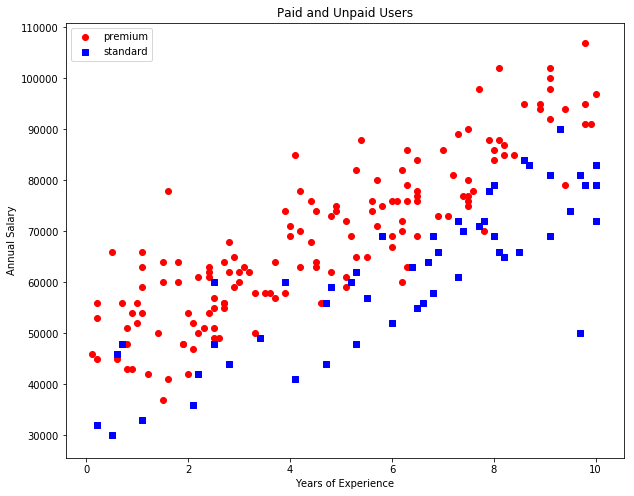

In [31]:
plot_data()

In [36]:
from typing import List, Tuple
from scratch.linear_algebra import Vector 
from scratch.linear_algebra import vector_mean
from scratch.statistics import standard_deviation

def scale(data: List[Vector]) -> Tuple[Vector, Vector]:
    """returns the means and standard deviations for each position"""
    dim = len(data[0])

    means = vector_mean(data)
    stdevs = [standard_deviation([vector[i] for vector in data])
              for i in range(dim)]

    return means, stdevs

def rescale(data: List[Vector]) -> List[Vector]:
    """
    Rescales the input data so that each position has
    mean 0 and standard deviation 1. (Leaves a position
    as is if its standard deviation is 0.)
    """
    dim = len(data[0])
    means, stdevs = scale(data)

    # Make a copy of each vector
    rescaled = [v[:] for v in data]

    for v in rescaled:
        for i in range(dim):
            if stdevs[i] > 0:
                v[i] = (v[i] - means[i]) / stdevs[i]

    return rescaled

least squares fit: 100%|██████████| 1000/1000 [00:01<00:00, 831.91it/s]


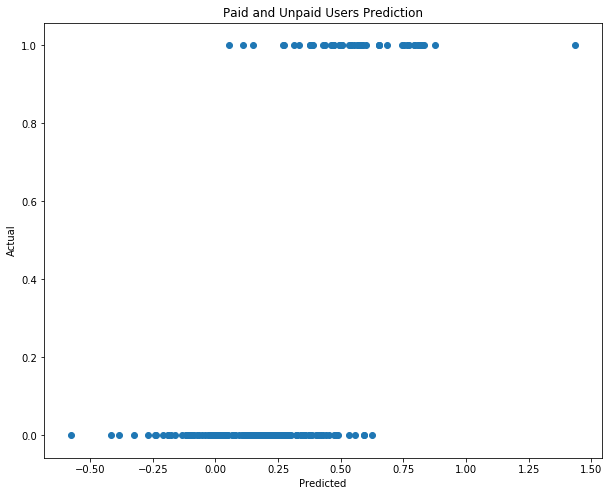

In [41]:
# Predict premium accounts using linear regression
from scratch.multiple_regression import least_squares_fit, predict
from scratch.gradient_descent import gradient_step

learning_rate = 0.001
rescaled_xs = rescale(xs)
beta = least_squares_fit(rescaled_xs, ys, learning_rate, 1000, 1)
# [0.26, 0.43, -0.43]
predictions = [predict(x_i, beta) for x_i in rescaled_xs]

plt.figure(figsize=(10,8))
plt.scatter(predictions, ys)
plt.title("Paid and Unpaid Users Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig('images/linear_regression_for_classification2.png')
plt.show();

But this approach leads to a couple of immediate problems:

- We’d like for our predicted outputs to be 0 or 1, to indicate class membership. It’s fine if they’re between 0 and 1, since we can interpret these as probabilities—an output of 0.25 could mean 25% chance of being a paid member. But the outputs of the `linear model` can be huge positive numbers or even negative numbers, which it’s not clear how to interpret. Indeed, here a lot of our predictions were negative.
- The `linear regression model` assumed that the errors were uncorrelated with the columns of x. But here, the regression coefficent for experience is 0.43, indicat‐ ing that more experience leads to a greater likelihood of a premium account. This means that our model outputs very large values for people with lots of experi‐ ence. But we know that the actual values must be at most 1, which means that necessarily very large outputs (and therefore very large values of `experience`) correspond to very large negative values of the error term. Because this is the case, our estimate of `beta` is biased.

What we’d like instead is for large positive values of `dot(x_i, beta)` to correspond to probabilities close to 1, and for large negative values to correspond to probabilities close to 0. We can accomplish this by applying another function to the result.

## Example 2: Predict paid account if the probability exceeds 0.5

In [106]:
tp = fp = tn = fn = 0

for x_i, y_i in zip(x_test, y_test):
    prediction = logistic(dot(beta, x_i))
    
    if y_i == 1 and prediction >= 0.5: # TP: paid and we predict paid
        tp += 1
    elif y_i == 1: # FN: paid and we predict unpaid
        fn += 1
    elif prediction >= 0.5: # FP: unpaid and we predict paid
        fp += 1
    else: # TN: unpaid and we predict unpaid
        tn += 1
        
precision = tp / (tp + fp)
recall = tp / (tp + fn)

In [108]:
# Precision: when we predict `paid account`, we were right 75% of the time
# Recall: when a user has a paid account we predict `paid account` 80% of the time
precision, recall

(0.75, 0.8)

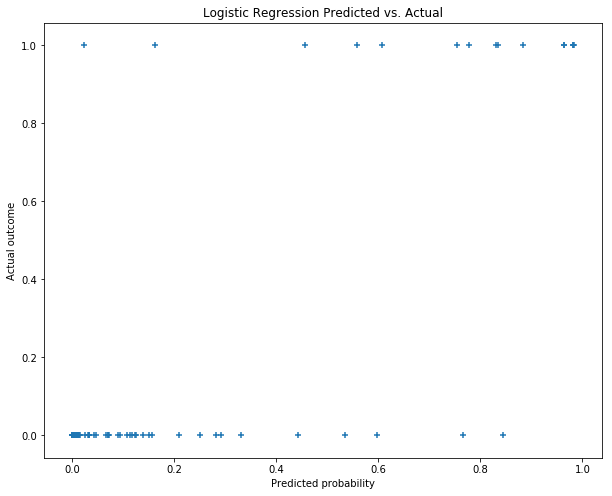

In [110]:
# Predictions vs. actuals plot
predictions = [logistic(dot(beta, x_i)) for x_i in x_test]

plt.figure(figsize=(10,8))
plt.scatter(predictions, y_test, marker='+')
plt.xlabel("Predicted probability")
plt.ylabel("Actual outcome")
plt.title("Logistic Regression Predicted vs. Actual")
plt.savefig('images/logistic3.png')
plt.show();